### Data describtion

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

 number of cylinders: displacement = π ( 12 × bore )2 × stroke × n

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")

In [2]:
auto=pd.read_csv("D:\\AI\\data science\\cat_Datas\\Automobile_data - Automobile_data.csv")

In [3]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
auto.describe(include=['O'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [6]:
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# converting some categorical features into numeric
mapping_doors={'two':2,'four':4,'?':np.nan}
mappring_cylinders={'four':4 ,'six':6 ,'five':5, 'three':3 ,'twelve':12 ,'two':2 ,'eight':8}
auto['num-of-doors'] = auto['num-of-doors'].replace(mapping_doors)
auto['num-of-cylinders'] = auto['num-of-cylinders'].replace(mappring_cylinders)

In [8]:
# converting feature which should be numeric as price and fill na with np.nun
for x in ['normalized-losses','bore','horsepower','stroke','price','peak-rpm']:
        auto[x]=pd.to_numeric(auto[x],errors='coerce')

In [9]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null float64
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null int64
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

##### there are missing in normalized-losses,bore,stroke,price,num-of-doors

## Dealing with missing data

In [10]:
auto.loc[auto['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [11]:
auto.loc[ auto["body-style"]=='sedan'] ['num-of-doors'] .value_counts()

4.0    79
2.0    15
Name: num-of-doors, dtype: int64

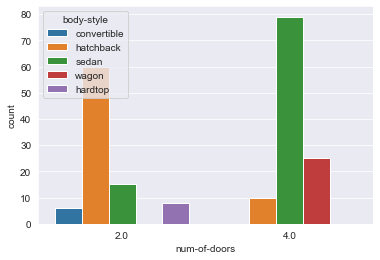

In [12]:
sns.countplot(x='num-of-doors',hue="body-style",data=auto)

In [13]:
auto["num-of-doors"].fillna(4.0,inplace=True)

In [14]:
auto.loc[auto['bore'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


#### here regardless missing values we can observe that there is duplicate rows but because of changing prices it won't apear 
#### later we will check them 

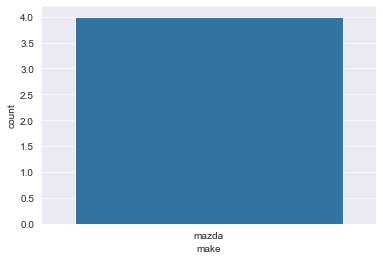

In [15]:
sns.countplot(x=auto.loc[auto['bore'].isna()]['make'])

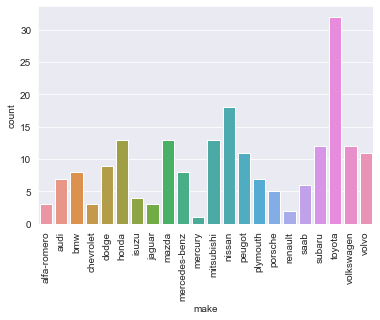

In [16]:
sns.countplot(x=auto.loc[auto['bore'].isna()==False]['make'])
plt.xticks(rotation=90)
plt.show()

<Figure size 720x720 with 0 Axes>

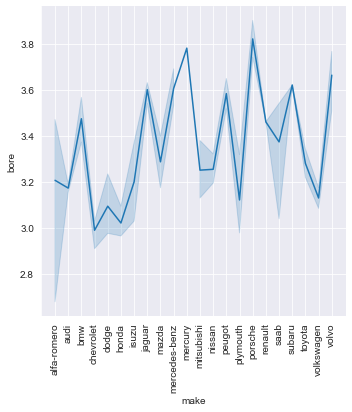

In [17]:
plt.figure(figsize=(10,10))
sns.relplot(x="make",y="bore",data=auto,kind="line")
plt.xticks(rotation=90)
plt.show()

In [18]:
mean_bore=auto.loc[(auto['make']=='mazda') & (auto['body-style']=='hatchback') ]['bore'].mean()
mean_stroke=auto.loc[(auto['make']=='mazda') & (auto['body-style']=='hatchback') ]['stroke'].mean()

In [19]:
auto['bore'].fillna(mean_bore,inplace=True)
auto['stroke'].fillna(mean_stroke,inplace=True)

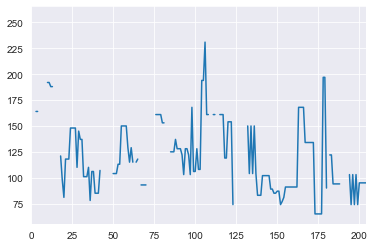

In [20]:
auto['normalized-losses'].plot()

####  missing is not random
##### if we take a look on data we observe that isn't been shuffled

In [21]:
auto.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [22]:
# we want to know each meadian of 'normalized-losses' based on car's model
median_normalized_losses=auto[['make','normalized-losses']].groupby(['make'],as_index=False).median()

In [23]:

median_normalized_losses

,make,normalized-losses
0,alfa-romero,NaN
1,audi,161.0
2,bmw,190.0
3,chevrolet,98.0
4,dodge,145.0
5,honda,101.0
6,isuzu,NaN
7,jaguar,145.0
8,mazda,115.0
9,mercedes-benz,93.0


In [24]:
# here we want to fill each nan values with it's median by car's model in the small data 
for i in  auto.loc[auto['normalized-losses'].isna()]['make'].index:
    for j in range (0,22):
        if auto.loc[i,'make'] == median_normalized_losses['make'][j]:
            auto.loc[i,'normalized-losses'] = median_normalized_losses['normalized-losses'][j] 
            

###### Another way to fill null with median by creating new data feame and concatenate

###### here we make a new data is nan values of normalized_losses and sort them by make column and reset index
nan_values_norm=auto.loc[auto['normalized-losses'].isna()].sort_values(by='make').reset_index()
###### here i will drop all nan values from data
nan_values_norm.dropna(inplace=True)
nan_values_norm.drop('index',axis=1,inplace=True)
###### here i concatenation all data 
auto = auto.append(nan_values_norm, ignore_index=True)

In [25]:
# drop na from all data 
auto.dropna(inplace=True)

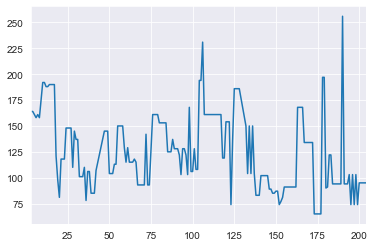

In [26]:

auto['normalized-losses'].plot()

In [27]:
auto.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [28]:
auto.shape

(193, 26)

## Duplicated values 

In [29]:
# appending all features instead of predicted 
auto.iloc[:,:-1].duplicated().sum()

7

In [30]:
auto.drop(auto.loc[auto.iloc[:,:-1].duplicated()].index,inplace=True)

In [31]:

auto.iloc[:,:-1].duplicated().sum()

0

In [32]:
auto.shape

(186, 26)

In [33]:
# shuffeling the data because it is not shuffled 
auto = auto.sample(frac=1, random_state=42).reset_index(drop=True)

### EDA

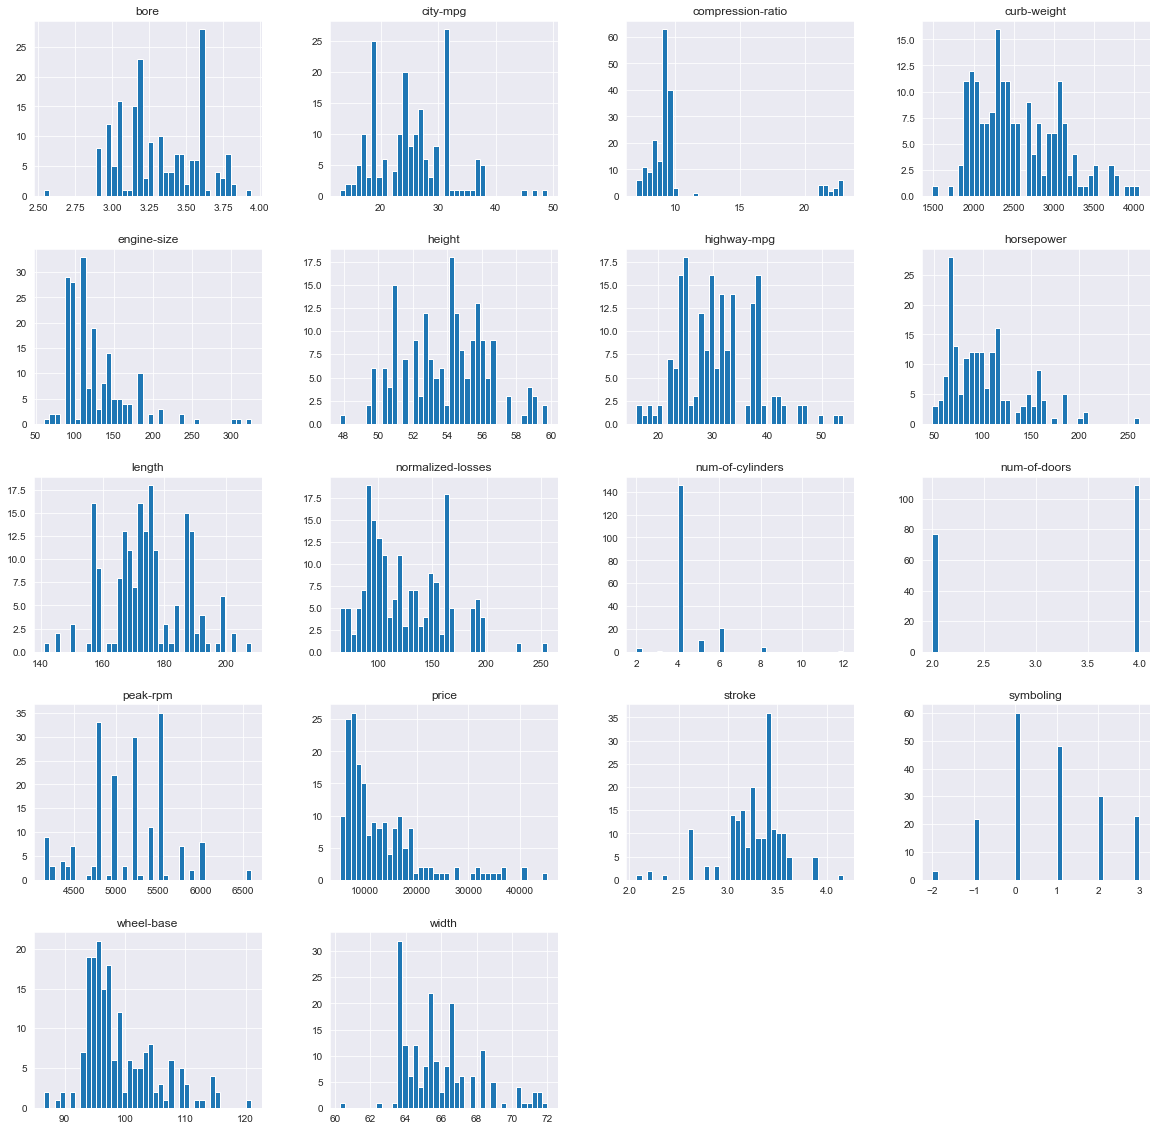

In [34]:
auto.hist(bins=40 , figsize=(20,20)) 
plt.show()


#### there is outlaiers in some features but i won't drop it because data is too little , try to scale it if you want
##### compression ratio seems to be categorical


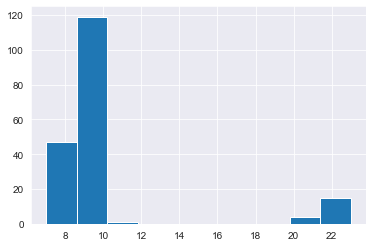

In [35]:
plt.hist(auto['compression-ratio'])
plt.show()

In [36]:
for i in range(0,len(auto)):
    if auto['compression-ratio'][i] > 10 :
           auto['compression-ratio'][i] = 1
    else:  auto['compression-ratio'][i] = 0       

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


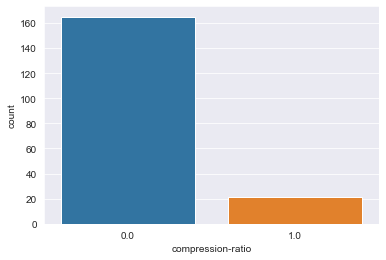

In [37]:
sns.countplot(auto['compression-ratio'])
plt.show()

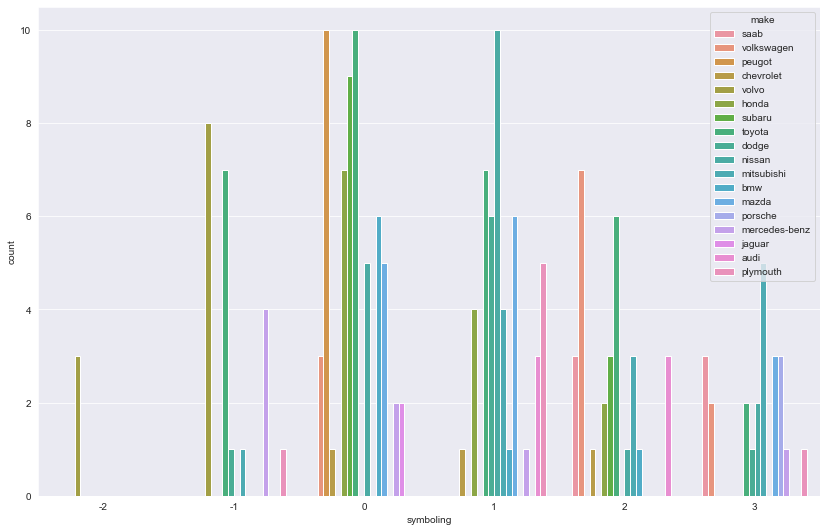

In [38]:
## which car's model is more risky ?
plt.figure(figsize=(14,9))
sns.countplot('symboling',data=auto,hue='make')
plt.show()

volvo is the most safe and mazda , saab is most risky cars

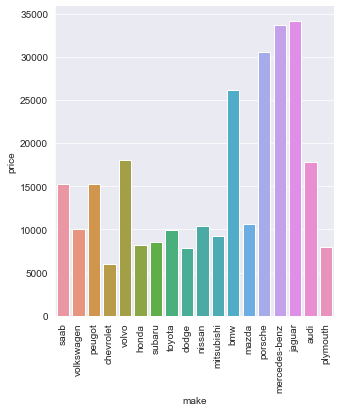

In [43]:
#which car type has the most price?
sns.catplot(x='make',y='price',data=auto,kind='bar',ci=None)
plt.xticks(rotation=90)
plt.show()


jaguar is the highest price value and chevrolet is the lowest
but next show describe that in all mercedes is the highest price car model

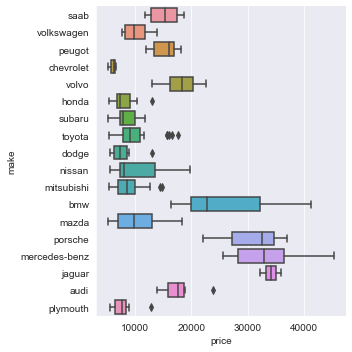

In [40]:

sns.catplot(x='price',y='make',data=auto,kind='box')
plt.show()

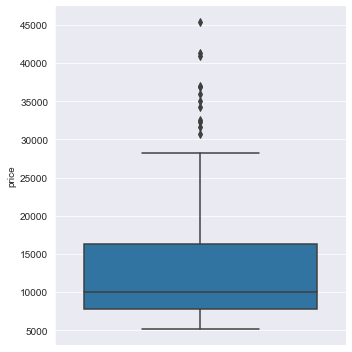

In [41]:
sns.catplot(y='price',data=auto,kind='box')

In [44]:
auto['num-of-cylinders'].value_counts()

4     146
6      21
5      10
8       4
2       3
12      1
3       1
Name: num-of-cylinders, dtype: int64

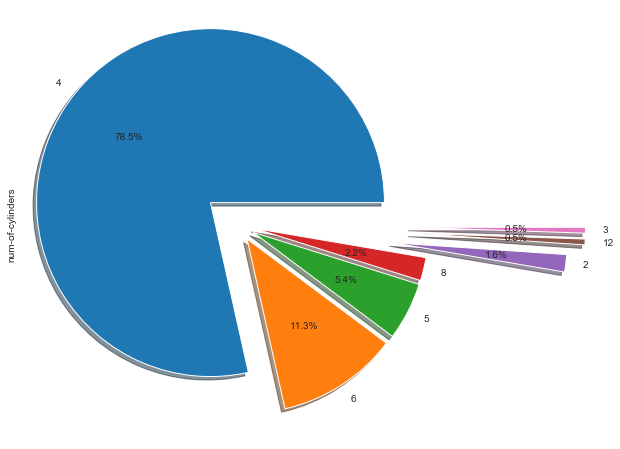

In [45]:
plt.figure(figsize=(10,8))
auto['num-of-cylinders'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode = [0.2,0.1,0.1,0.1,0.9 ,1,1]);

plt.show()


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system']:
            auto[i]=le.fit_transform(auto[i])


In [47]:

auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,150.0,13,1,0,2.0,2,1,0,99.1,...,121,5,3.54,3.07,0.0,110.0,5250.0,21,28,11850.0
1,2,122.0,16,1,0,2.0,3,1,0,97.3,...,109,5,3.19,3.40,0.0,85.0,5250.0,27,34,7975.0
2,2,94.0,16,1,0,4.0,3,1,0,97.3,...,109,5,3.19,3.40,0.0,100.0,5500.0,26,32,9995.0
3,0,161.0,10,1,0,4.0,3,2,0,107.9,...,120,5,3.46,3.19,0.0,97.0,5000.0,19,24,16630.0
4,0,161.0,10,0,1,4.0,4,2,0,114.2,...,152,3,3.70,3.52,1.0,95.0,4150.0,25,25,17075.0
5,1,98.0,2,1,0,2.0,2,1,0,94.5,...,90,1,3.03,3.11,0.0,70.0,5400.0,38,43,6295.0
6,-2,103.0,17,1,0,4.0,3,2,0,104.3,...,141,5,3.78,3.15,0.0,114.0,5400.0,24,28,15985.0
7,0,85.0,4,1,0,4.0,3,1,0,96.5,...,110,0,3.15,3.58,0.0,86.0,5800.0,27,33,10295.0
8,2,83.0,14,1,0,2.0,2,1,0,93.7,...,97,1,3.62,2.36,0.0,69.0,4900.0,31,36,5118.0
9,2,134.0,15,1,0,2.0,2,2,0,98.4,...,146,5,3.62,3.50,0.0,116.0,4800.0,24,30,11549.0
